1. 부산 기온 데이터 수집

2. 부산에서 가장 더웠던 날은? 검색

3. 매년 크리스마스의 최고 기온과 최저 기온 추이:plot

4. 월별 기온 데이터:boxplot

> * 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('./data/ta_20220921111236.csv',header=7)#불러들일 row위치 조정, default=utf-8
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


> * 결측치

In [12]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [11]:
df.dropna(inplace=True)

> * 컬럼 변경

In [6]:
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

In [ ]:
df['날짜']=df['날짜'].astype('datetime64')
df['년']=df['날짜'].dt.year
df['월']=df['날짜'].dt.month
df['일']=df['날짜'].dt.day

> * 가장 더웠던 날 검색

In [15]:
a=df.sort_values(by=['최고기온'],ascending=False).head(1)

In [23]:
b=a.loc[41035,'날짜']
c=a.loc[41035,'최고기온']
print("서울에서 가장 더웠던 날은? :{}, {}도".format(b,c))

서울에서 가장 더웠던 날은? :2016-08-14, 37.3도


> * 매년 크리스마스 최고기온, 최저기온 변화

In [30]:
Ch_df=df[(df['월']==12)&(df['일']==25)]

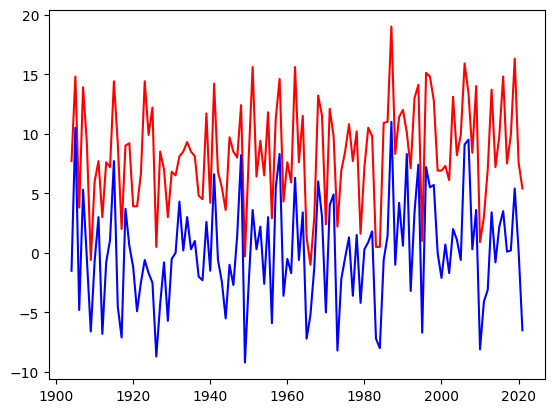

In [34]:
plt.plot(Ch_df['년'],Ch_df['최고기온'],color='r')
plt.plot(Ch_df['년'],Ch_df['최저기온'],color='b')

> * 월별 기온 데이터

In [60]:
df[df['월']==1]

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
267,1905-01-01,159,2.2,-2.6,7.4,1905,1,1
268,1905-01-02,159,5.8,-0.9,9.0,1905,1,2
269,1905-01-03,159,7.0,4.2,11.5,1905,1,3
270,1905-01-04,159,7.9,4.3,13.0,1905,1,4
271,1905-01-05,159,8.7,5.8,14.6,1905,1,5
...,...,...,...,...,...,...,...,...
43027,2022-01-27,159,6.3,2.8,11.9,2022,1,27
43028,2022-01-28,159,4.7,0.5,10.1,2022,1,28
43029,2022-01-29,159,3.3,1.1,7.7,2022,1,29
43030,2022-01-30,159,3.2,-1.2,9.6,2022,1,30


In [36]:
month_df=[]
for i in range(1,13):
    month_df.append(df[df['월']==i])

In [49]:
avg_df=[]
hi_df=[]
lo_df=[]
mon_li=[]
for i in range(12):
    avg_df.append(month_df[i]['평균기온'])
    hi_df.append(month_df[i]['최고기온'])
    lo_df.append(month_df[i]['최저기온'])
    

In [54]:
for i in range(1,13):
    mon_li.append(f'{i}월')

In [55]:
mon_li

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

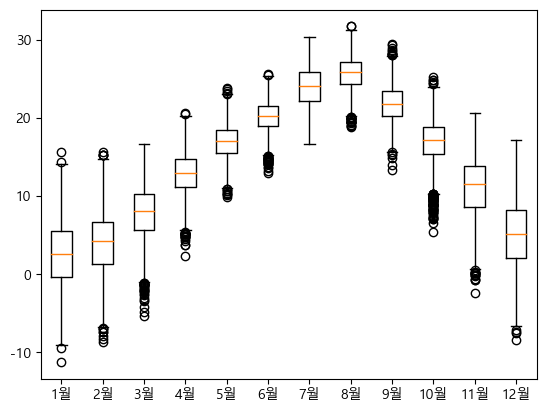

In [57]:
# 한글 사용시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

plt.boxplot(avg_df,labels=mon_li)
plt.show()

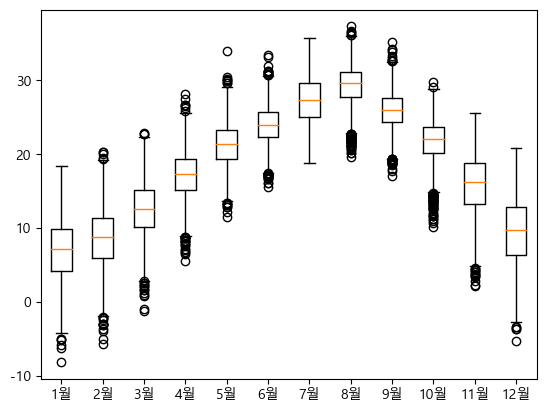

In [58]:
# 한글 사용시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

plt.boxplot(hi_df,labels=mon_li)
plt.show()

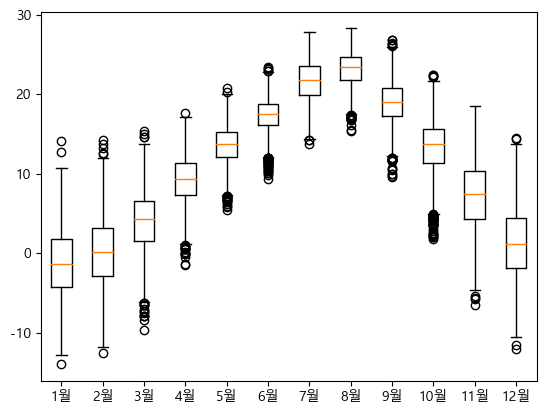

In [59]:
# 한글 사용시 설정
plt.rc('font',family='Malgun Gothic')      #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic'
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

plt.boxplot(lo_df,labels=mon_li)
plt.show()